EDA of Shipper dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Loading Logistics dataset
data = pd.read_csv('Logistics_data.csv')

In [4]:
#To see the columns
data.columns

Index(['quantity', 'service_delivery_duration', 'status', 'type_of_order',
       'weight', 'created_at', 'updated_at', 'levelOfService',
       'actual_start_datetime', 'attempts', 'multiday', 'actual_end_datetime',
       'account_name', 'appointment_at', 'expedite_level', 'Lead_Time'],
      dtype='object')

In [5]:
# datatypes of every attribute
data.dtypes

quantity                     float64
service_delivery_duration      int64
status                        object
type_of_order                 object
weight                       float64
created_at                    object
updated_at                    object
levelOfService                object
actual_start_datetime         object
attempts                       int64
multiday                        bool
actual_end_datetime           object
account_name                  object
appointment_at                object
expedite_level                object
Lead_Time                     object
dtype: object

In [6]:
#Shape of dataset
data.shape

(287511, 16)

In [7]:
#to see no.of unique values in each attribute
data.nunique()

quantity                        246
service_delivery_duration        85
status                           15
type_of_order                     9
weight                         5930
created_at                   286255
updated_at                   287510
levelOfService                  209
actual_start_datetime        219156
attempts                         20
multiday                          2
actual_end_datetime          181497
account_name                    642
appointment_at               259236
expedite_level                    2
Lead_Time                        33
dtype: int64

Handling Missing Values

In [8]:
#To see no.of missing values in every attribute
data.isnull().sum()

quantity                        734
service_delivery_duration         0
status                            0
type_of_order                    11
weight                           88
created_at                        0
updated_at                        0
levelOfService                  168
actual_start_datetime             0
attempts                          0
multiday                          0
actual_end_datetime          101616
account_name                      0
appointment_at                    0
expedite_level                    0
Lead_Time                         0
dtype: int64

Handling Outliers

In [9]:
import matplotlib.pyplot as plt

In [10]:
data.columns

Index(['quantity', 'service_delivery_duration', 'status', 'type_of_order',
       'weight', 'created_at', 'updated_at', 'levelOfService',
       'actual_start_datetime', 'attempts', 'multiday', 'actual_end_datetime',
       'account_name', 'appointment_at', 'expedite_level', 'Lead_Time'],
      dtype='object')

In [11]:
#To get all numeric columns
numeric_col = [feature for feature in data.columns if data[feature].dtype == 'float64' or data[feature].dtype == 'int64']
numeric_col

['quantity', 'service_delivery_duration', 'weight', 'attempts']

In [12]:
# Now observing all unique values in each of numeric variables
data['service_delivery_duration'].unique()

array([   30,     0,    20,    45,    15,    90,    10,    37,    18,
           5,    60,    22,     6,     7,     1,   120,    40,    72,
           2,   125,    17,    25,   200,    75,    11,    51,    14,
          21,     8,     3,     9,    13,    12,   180,   110,   210,
        1800,    50,    65,    48,     4,   100,    70,    16,    26,
          31,    24,    35,    19,    32,   240,   250,   121,    27,
          23,   150,    36,    33,    34,   300,   105,    42,   135,
         220,    55,   165,    39,   360,    52,   270,    74,   330,
          85,    69,    87,    86,    80,   178,    83,   140, 20150,
          43,    64,   175,    54], dtype=int64)

In [13]:
data[data['service_delivery_duration'] == 0]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
4,1.0,0,COMPLETED,D,0.0,2022-10-25 22:15:45.819,2023-08-04 08:43:42.952,DEFAULT,2022-10-26 16:11:51.437,1,False,2022-10-26 16:22:43.849,Aaron Hickman,2022-10-21 16:11:51.437,expedite,5 days
36,4.0,0,EXCEPTION,R,294.0,2023-09-28 15:18:13.534,2023-09-29 13:12:05.719,DEFAULT,2023-09-28 15:18:13.534,0,False,NaN,Adam Ford,2023-08-29 15:18:13.534,expedite,30 days
56,1.0,0,NEW,T,150.0,2023-11-09 20:47:43.620,2023-11-09 20:51:13.815,NaN,2023-11-09 20:47:43.620,0,False,NaN,Adam Ford,2023-10-09 20:47:43.620,expedite,31 days
92,1.0,0,NEW,T,150.0,2024-01-29 21:21:33.228,2024-01-29 21:21:33.302,NaN,2024-01-29 21:21:33.228,0,False,NaN,Adam Ford,2023-12-30 21:21:33.228,expedite,30 days
109,1.0,0,VERIFIED,D,100.0,2023-11-11 01:52:36.580,2023-11-16 20:58:16.408,ST,2023-11-11 01:52:36.580,0,False,NaN,Adam Ford,2023-10-16 01:52:36.580,expedite,26 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287451,1.0,0,VERIFIED,D,48.0,2023-05-26 14:43:49.590,2023-08-04 09:25:05.602,BTSPECIAL,2023-05-26 14:43:49.590,0,False,NaN,William Lawrence,2023-05-06 14:43:49.590,expedite,20 days
287452,106.0,0,COMPLETED,D,2207.0,2023-03-31 14:06:18.647,2023-08-04 09:15:00.463,AIRPORTTRANSFERSHIPMENTNORECOVERYFEE,2023-05-05 19:35:36.731,1,False,2023-05-05 19:37:27.921,William Lopez,2023-04-29 19:35:36.731,expedite,6 days
287453,102.0,0,COMPLETED,D,2548.0,2023-03-31 14:06:16.852,2023-08-04 09:15:00.387,AIRPORTTRANSFERSHIPMENTNORECOVERYFEE,2023-05-05 19:35:36.731,1,False,2023-05-05 19:39:26.279,William Lopez,2023-04-29 19:35:36.731,expedite,6 days
287454,1.0,0,COMPLETED,R,0.0,2022-11-30 22:51:51.130,2023-08-04 08:46:15.925,DEFAULT,2022-12-01 17:22:36.758,1,False,2022-12-01 17:23:23.167,William Murphy,2022-11-14 17:22:36.758,expedite,17 days


Clearly we can see one value of 20150 which is way off from rest of the data

In [14]:
#Observing all records with 'service_delivery_duration' = 20150
data[data['service_delivery_duration'] == 20150]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
180666,1.0,20150,COMPLETED,R,331.0,2023-02-22 14:34:52.775,2023-08-04 08:54:02.510,LYN,2023-02-24 00:36:21.287,1,False,2023-02-24 00:37:43.651,Robert Blair,2023-02-07 00:36:21.287,expedite,17 days


In [15]:
df = data.copy()

In [16]:
#As we get only one record for 20150, we can definitely classify it as an outlier and remove it 
df = df[df['service_delivery_duration'] != 20150]

In [17]:
#Observing unique values in 'attempts'
df['attempts'].unique()

array([ 1,  0,  2,  3,  4,  6,  5,  7,  8,  9, 21, 13, 11, 10, 12, 16, 20,
       14, 15, 17], dtype=int64)

In [18]:
df[df['attempts'] == 0]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
12,1.0,30,COMPLETED,D,0.0,2023-09-25 21:59:06.120,2023-09-26 22:35:43.171,DEFAULT,2023-09-26 22:28:44.618,0,False,2023-09-26 16:30:00.000,Aaron Hickman,2023-09-17 22:28:44.618,expedite,9 days
16,1.0,30,COMPLETED,D,0.0,2023-09-25 21:58:59.160,2023-09-26 22:35:37.531,DEFAULT,2023-09-26 22:28:44.618,0,False,2023-09-26 15:00:00.000,Aaron Hickman,2023-09-18 22:28:44.618,expedite,8 days
17,1.0,30,COMPLETED,D,0.0,2023-09-25 21:59:03.864,2023-09-26 22:35:41.276,DEFAULT,2023-09-26 22:28:44.618,0,False,2023-09-26 16:00:00.000,Aaron Hickman,2023-09-17 22:28:44.618,expedite,9 days
25,1.0,30,COMPLETED,D,0.0,2023-09-25 21:59:01.525,2023-09-26 22:35:39.390,DEFAULT,2023-09-26 22:28:44.618,0,False,2023-09-26 15:30:00.000,Aaron Hickman,2023-09-20 22:28:44.618,expedite,6 days
26,1.0,30,COMPLETED,D,0.0,2023-09-25 21:58:56.641,2023-09-26 22:35:35.633,DEFAULT,2023-09-26 22:28:44.618,0,False,2023-09-26 14:30:00.000,Aaron Hickman,2023-09-20 22:28:44.618,expedite,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287506,30.0,30,NEW,R,4872.0,2021-10-11 16:40:25.782,2023-08-04 08:17:14.192,DEFAULT,2021-10-11 16:40:25.782,0,False,NaN,Zachary Baker MD,2021-09-16 16:40:25.782,expedite,25 days
287507,1.0,30,NEW,R,1.0,2021-10-11 16:40:32.227,2023-08-04 08:13:56.874,DEFAULT,2021-10-11 16:40:32.227,0,False,NaN,Zachary Baker MD,2021-09-16 16:40:32.227,expedite,25 days
287508,47.0,30,NEW,R,11303.0,2021-10-11 16:40:31.840,2023-08-04 08:18:56.808,DEFAULT,2021-10-11 16:40:31.840,0,False,NaN,Zachary Baker MD,2021-09-15 16:40:31.840,expedite,26 days
287509,1.0,30,NEW,R,1.0,2021-10-11 16:40:17.928,2023-08-04 08:15:15.370,DEFAULT,2021-10-11 16:40:17.928,0,False,NaN,Zachary Baker MD,2021-09-14 16:40:17.928,expedite,27 days


we can see there are no wayward values in 'attempts'

In [19]:
df['quantity'].unique()

array([1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 1.000e+01,
       7.000e+00, 8.000e+00, 6.000e+00, 3.200e+01, 1.500e+01, 1.400e+01,
       1.200e+01, 3.300e+01, 1.100e+01, 0.000e+00, 9.000e+00, 1.700e+01,
       1.900e+01, 5.400e+01, 2.200e+01, 3.500e+01, 1.800e+01, 3.800e+01,
       2.500e+01, 2.600e+01, 2.000e+01, 3.900e+01, 3.000e+01, 1.300e+01,
       2.300e+01, 3.100e+01, 2.700e+01, 5.700e+01,       nan, 2.400e+01,
       6.400e+01, 5.300e+01, 3.400e+01, 8.300e+01, 8.700e+01, 3.600e+01,
       4.000e+01, 1.600e+01, 8.500e+01, 2.100e+01, 2.340e+02, 1.380e+02,
       3.700e+01, 2.800e+01, 1.000e+02, 6.000e+01, 2.100e+02, 1.550e+02,
       1.420e+02, 2.530e+02, 4.700e+01, 5.200e+01, 7.000e+01, 6.900e+01,
       1.040e+02, 9.100e+01, 5.800e+01, 2.130e+02, 5.100e+01, 1.850e+02,
       2.400e+02, 1.830e+02, 2.970e+02, 3.280e+02, 5.900e+01, 5.000e+02,
       9.000e+01, 3.320e+02, 9.600e+02, 1.930e+02, 4.500e+01, 7.700e+01,
       6.700e+01, 4.400e+01, 1.500e+02, 2.780e+02, 

In [20]:
df[df['quantity'] == 0]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
235,0.0,30,EXCEPTION,D,0.0,2021-07-31 15:13:01.775,2023-08-04 09:34:42.622,DEFAULT,2021-07-31 15:13:01.775,0,False,NaN,Alex Alvarez,2021-07-10 15:13:01.775,expedite,21 days
237,0.0,30,EXCEPTION,D,0.0,2021-07-31 15:13:01.223,2023-08-04 09:34:42.605,DEFAULT,2021-07-31 15:13:01.223,0,False,NaN,Alex Alvarez,2021-07-11 15:13:01.223,expedite,20 days
329,0.0,30,EXCEPTION,D,0.0,2023-05-25 14:02:11.781,2023-08-04 09:35:44.025,DEFAULT,2023-05-25 14:02:11.781,0,False,NaN,Alex Alvarez,2023-05-04 14:02:11.781,expedite,21 days
671,0.0,0,VERIFIED,D,98.0,2022-11-22 12:32:42.408,2023-08-04 08:45:50.226,DEFAULT,2022-11-22 12:32:42.408,0,False,NaN,Allen Mcintyre,2022-10-27 12:32:42.408,expedite,26 days
776,0.0,2,EXCEPTION,D,10.0,2021-12-30 14:33:27.991,2023-08-04 08:26:34.759,EZONE,2021-12-30 14:44:19.519,1,False,NaN,Alyssa Bird,2021-12-23 14:44:19.519,expedite,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282262,0.0,20,EXCEPTION,D,0.0,2023-12-11 15:07:48.341,2023-12-11 15:07:48.341,DEFAULT,2023-12-11 15:07:48.341,0,False,NaN,Troy Hill,2023-11-23 15:07:48.341,expedite,18 days
282270,0.0,20,EXCEPTION,D,0.0,2023-12-11 15:10:24.661,2023-12-11 15:10:24.661,DEFAULT,2023-12-11 15:10:24.661,0,False,NaN,Troy Hill,2023-11-22 15:10:24.661,expedite,19 days
287282,0.0,30,EXCEPTION,D,0.0,2021-06-09 13:39:07.078,2023-08-04 08:14:24.356,DEFAULT,2021-06-09 13:39:07.078,0,False,NaN,Whitney Castillo,2021-06-04 13:39:07.078,expedite,5 days
287283,0.0,30,EXCEPTION,D,0.0,2021-06-09 13:38:56.770,2023-08-04 08:14:24.340,DEFAULT,2021-06-09 13:38:56.770,0,False,NaN,Whitney Castillo,2021-06-06 13:38:56.770,expedite,3 days


In [21]:
df[(df['weight'] == 0) & (df['quantity'] == 0)]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
235,0.0,30,EXCEPTION,D,0.0,2021-07-31 15:13:01.775,2023-08-04 09:34:42.622,DEFAULT,2021-07-31 15:13:01.775,0,False,NaN,Alex Alvarez,2021-07-10 15:13:01.775,expedite,21 days
237,0.0,30,EXCEPTION,D,0.0,2021-07-31 15:13:01.223,2023-08-04 09:34:42.605,DEFAULT,2021-07-31 15:13:01.223,0,False,NaN,Alex Alvarez,2021-07-11 15:13:01.223,expedite,20 days
329,0.0,30,EXCEPTION,D,0.0,2023-05-25 14:02:11.781,2023-08-04 09:35:44.025,DEFAULT,2023-05-25 14:02:11.781,0,False,NaN,Alex Alvarez,2023-05-04 14:02:11.781,expedite,21 days
879,0.0,30,EXCEPTION,D,0.0,2021-07-28 18:06:57.824,2023-08-04 09:34:42.505,DEFAULT,2021-07-28 18:06:57.824,0,False,NaN,Amanda Johnson,2021-07-25 18:06:57.824,expedite,3 days
1389,0.0,30,EXCEPTION,R,0.0,2021-07-06 18:35:39.473,2023-08-04 08:15:42.955,DEFAULT,2021-07-06 18:35:39.473,0,False,NaN,Amanda Johnson,2021-07-01 18:35:39.473,expedite,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282262,0.0,20,EXCEPTION,D,0.0,2023-12-11 15:07:48.341,2023-12-11 15:07:48.341,DEFAULT,2023-12-11 15:07:48.341,0,False,NaN,Troy Hill,2023-11-23 15:07:48.341,expedite,18 days
282270,0.0,20,EXCEPTION,D,0.0,2023-12-11 15:10:24.661,2023-12-11 15:10:24.661,DEFAULT,2023-12-11 15:10:24.661,0,False,NaN,Troy Hill,2023-11-22 15:10:24.661,expedite,19 days
287282,0.0,30,EXCEPTION,D,0.0,2021-06-09 13:39:07.078,2023-08-04 08:14:24.356,DEFAULT,2021-06-09 13:39:07.078,0,False,NaN,Whitney Castillo,2021-06-04 13:39:07.078,expedite,5 days
287283,0.0,30,EXCEPTION,D,0.0,2021-06-09 13:38:56.770,2023-08-04 08:14:24.340,DEFAULT,2021-06-09 13:38:56.770,0,False,NaN,Whitney Castillo,2021-06-06 13:38:56.770,expedite,3 days


In [22]:
df['weight'].unique()

array([    0.,  1986.,   400., ..., 11420.,  4802., 11303.])

In [23]:
df[df['weight'] == 0]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
0,1.0,30,COMPLETED,R,0.0,2023-10-11 21:17:19.232,2023-10-12 16:18:46.230,DEFAULT,2023-10-12 16:17:40.390,1,False,2023-10-12 16:18:45.098,Aaron Hickman,2023-10-04 16:17:40.390,expedite,8 days
1,3.0,30,COMPLETED,D,0.0,2023-11-08 22:15:31.024,2023-11-09 15:15:37.092,DEFAULT,2023-11-09 14:28:16.433,1,False,2023-11-09 15:15:36.276,Aaron Hickman,2023-11-04 14:28:16.433,expedite,5 days
2,1.0,30,COMPLETED,D,0.0,2023-11-30 22:53:35.310,2023-12-04 23:20:21.535,DEFAULT,2023-12-04 23:09:36.288,1,False,2023-12-04 23:20:21.136,Aaron Hickman,2023-11-30 23:09:36.288,expedite,4 days
3,1.0,30,EXCEPTION,R,0.0,2023-10-23 21:15:50.899,2023-10-24 20:07:43.645,DEFAULT,2023-10-24 20:07:36.035,1,False,NaN,Aaron Hickman,2023-10-17 20:07:36.035,expedite,7 days
4,1.0,0,COMPLETED,D,0.0,2022-10-25 22:15:45.819,2023-08-04 08:43:42.952,DEFAULT,2022-10-26 16:11:51.437,1,False,2022-10-26 16:22:43.849,Aaron Hickman,2022-10-21 16:11:51.437,expedite,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287458,1.0,0,COMPLETED,D,0.0,2023-01-03 22:26:28.693,2023-08-04 08:49:01.330,DEFAULT,2023-01-04 20:36:41.728,1,False,2023-01-04 20:47:15.749,William Murphy,2022-12-19 20:36:41.728,expedite,16 days
287459,1.0,30,COMPLETED,D,0.0,2023-10-04 20:56:56.706,2023-10-05 20:21:22.050,DEFAULT,2023-10-05 20:19:56.982,1,False,2023-10-05 20:21:21.435,William Murphy,2023-09-22 20:19:56.982,expedite,13 days
287470,2.0,30,COMPLETED,D,0.0,2023-07-13 21:59:38.630,2023-08-04 09:29:59.482,DEFAULT,2023-07-14 14:24:14.666,1,False,2023-07-14 14:26:13.587,William Winters PhD,2023-07-09 14:24:14.666,expedite,5 days
287471,2.0,30,COMPLETED,D,0.0,2023-07-13 21:48:13.688,2023-08-04 09:29:59.353,DEFAULT,2023-07-14 12:55:44.474,1,False,2023-07-14 14:35:34.734,William Winters PhD,2023-07-09 12:55:44.474,expedite,5 days


As there are wide range of values belonging to 'quantity' and 'weight', there is a chance for outliers
Hence we use boxplots to observe them

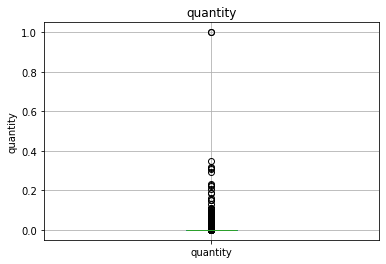

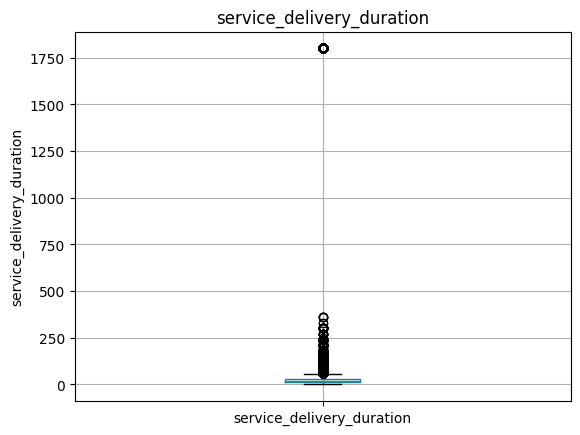

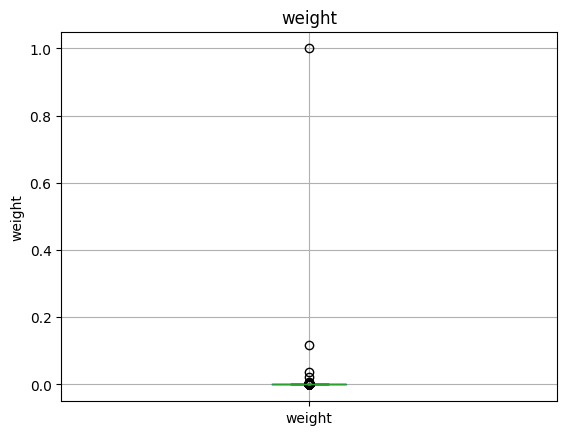

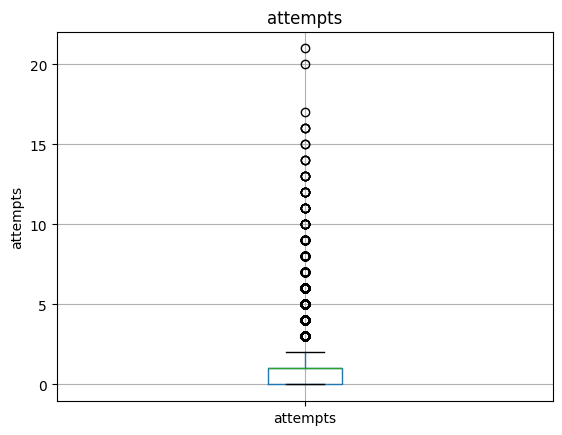

In [24]:
#Using box plots to see if there are any outliers in data
# we will use Min-Max Transformation to transform the values of 'quantity' and 'weight' since there are varying highly
for col in numeric_col:
    df_1 = df.copy()
    if (df[col].dtype == 'float64'):
        # Calculate min and max values
        x_min = df_1[col].min()
        x_max = df_1[col].max()

        # Perform min-max normalization
        df_1[col] = (df_1[col] - x_min) / (x_max - x_min)
        df_1.boxplot(column=col)
        plt.ylabel(col)
        plt.title(col)
        plt.show()
    else:
        df_1.boxplot(column=col)
        plt.ylabel(col)
        plt.title(col)
        plt.show()   
      

In [25]:
# to find no.of outliers in each numeric column
# Calculate the IQR
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Filter rows within the bounds
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Number of outliers
    num_outliers = len(df) - len(filtered_df)
    print("column : {} has {} outliers".format(col,num_outliers))


column : quantity has 33492 outliers
column : service_delivery_duration has 2187 outliers
column : weight has 24006 outliers
column : attempts has 12796 outliers


We can clearly see there are too many outliers in each numerical column of dataset 

Hence we will impute missing values in these columns by using class 'median' instead of class 'mean'

Imputing Missing Values

In [26]:
#we impute missing fields using class median 
# we find median of every attribute of 'numeric_col' records belonging to the same 'account_name' and then we replace missing field with their corresponding values 
# Group by 'account_name'
for col in numeric_col:
    grouped = df.groupby('account_name')

    # Calculate median quantity within each group
    median_quantity = grouped[col].transform('median')

    # Impute missing values with the median quantity
    df[col] = df[col].fillna(median_quantity)

In [27]:
df.isnull().sum()

quantity                         15
service_delivery_duration         0
status                            0
type_of_order                    11
weight                            4
created_at                        0
updated_at                        0
levelOfService                  168
actual_start_datetime             0
attempts                          0
multiday                          0
actual_end_datetime          101616
account_name                      0
appointment_at                    0
expedite_level                    0
Lead_Time                         0
dtype: int64

In [28]:
# Even after imputing we still see some missing values in columns 'quantity' and 'weight'
# the reason this values might still be missing is that all the columns belonging to that particular class might be null
# Display rows with missing values in the 'weight' column
missing_rows = df[df['weight'].isnull()]
missing_rows

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
28537,1.0,20,COMPLETED,T,NaN,2024-01-25 15:47:07.680,2024-01-29 13:15:41.497,DEFAULT,2024-01-27 14:25:00.000,0,False,2024-01-27 14:45:00.000,Craig Maddox,2024-01-20 14:25:00.000,expedite,7 days
55156,1.0,20,COMPLETED,T,NaN,2023-11-17 20:48:15.727,2023-11-17 20:50:48.278,BOBTRUCK,2023-11-17 20:48:15.727,0,False,NaN,Jeffrey Cook,2023-10-22 20:48:15.727,expedite,26 days
71740,1.0,20,COMPLETED,T,NaN,2023-09-15 06:30:56.857,2023-12-22 10:13:05.750,NONE,2023-09-15 06:33:24.694,0,False,2023-09-15 06:38:59.617,Kurt Richardson,2023-08-22 06:33:24.694,expedite,24 days
258702,1.0,20,COMPLETED,T,NaN,2023-09-15 06:24:44.844,2023-12-22 10:12:59.909,NONE,2023-09-15 06:26:18.704,0,False,2023-09-15 06:28:11.105,Thomas Monroe,2023-09-06 06:26:18.704,expedite,9 days


We will use Global median to fill in this values

In [29]:
# Hence we use global median for both 'weight' and 'quantity' columns in remaining fields
for col in numeric_col:
    median = df[col].median()
    df[col] = df[col].fillna(median)

In [30]:
df.isnull().sum()

quantity                          0
service_delivery_duration         0
status                            0
type_of_order                    11
weight                            0
created_at                        0
updated_at                        0
levelOfService                  168
actual_start_datetime             0
attempts                          0
multiday                          0
actual_end_datetime          101616
account_name                      0
appointment_at                    0
expedite_level                    0
Lead_Time                         0
dtype: int64

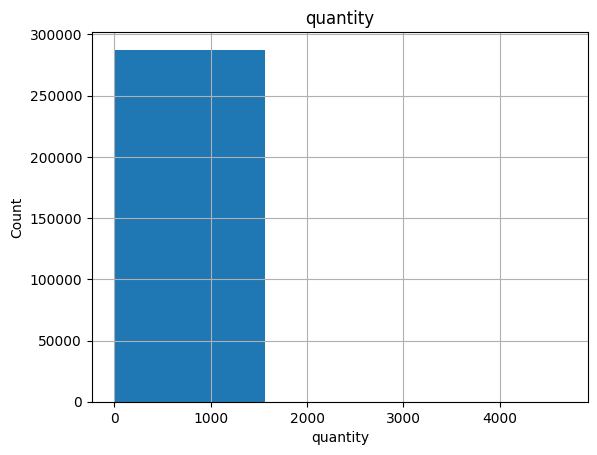

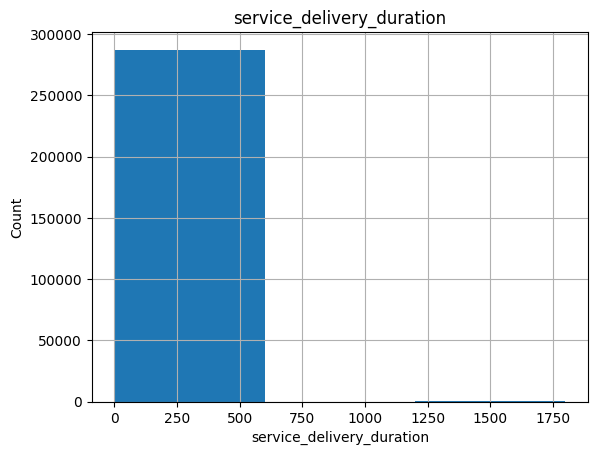

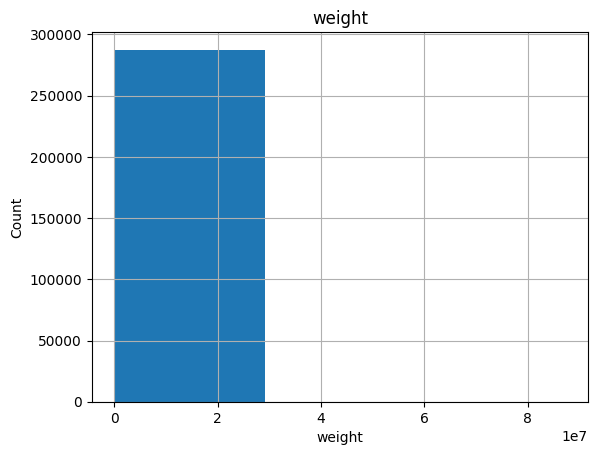

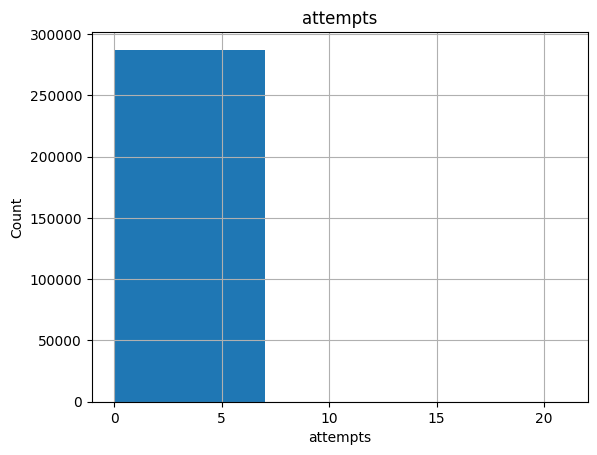

In [31]:
for col in numeric_col:
    df[col].hist(bins=3)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

In [32]:
df[df['weight'] < 0]

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,actual_end_datetime,account_name,appointment_at,expedite_level,Lead_Time
198337,1.0,20,COMPLETED,D,-2.0,2023-04-18 20:53:59.904,2023-08-04 09:05:06.107,WG,2023-04-19 13:15:11.307,1,False,2023-04-19 13:45:17.069,Robert Nguyen,2023-04-08 13:15:11.307,expedite,11 days


We can observe that a single record has value of weight as '-2.0'. hence it has to be removed

In [33]:
df = df[df['weight'] != -2]

From the histograms we can infer that most of the data is concentrated in a certain region.
For the variable 'quantity', all most all of the quantities range 0-1500
For the variable 'service_delivery_duration', all most all of the values range 0-600
For the variable 'weights', all most all of the values range 0-3
For the variable 'attempts', all most all of the values range 0-7

Now Observation of Categorical variables

In [35]:
#To get Categorical columns
category_col = [feature for feature in data.columns if df[feature].dtype == 'O']
category_col

['status',
 'type_of_order',
 'created_at',
 'updated_at',
 'levelOfService',
 'actual_start_datetime',
 'actual_end_datetime',
 'account_name',
 'appointment_at',
 'expedite_level',
 'Lead_Time']

there are missing values in 'type_of_order', 'actual_end_datetime', 'levelOfService'

We will drop 'actual_end_datetime' field because there are more than 1,00,000 values 

In [36]:
df_new = df.drop(columns = ['actual_end_datetime'])

In [37]:
missing_fields = ['type_of_order', 'levelOfService']

We will follow the same approach as we followed in handling numeric columns by replacing missing values in categorical columns using majority label of same class for columns 'type_of_order' and 'levelOfService'

In [38]:
for col in missing_fields:
    grouped = df_new.groupby('account_name')

    # Calculate majority label within each group
    mode = grouped[col].agg(pd.Series.mode)

    # Impute missing values with the majority_label
    df_new[col] = df_new[col].fillna(mode)

In [39]:
df_new.isnull().sum()

quantity                       0
service_delivery_duration      0
status                         0
type_of_order                 11
weight                         0
created_at                     0
updated_at                     0
levelOfService               168
actual_start_datetime          0
attempts                       0
multiday                       0
account_name                   0
appointment_at                 0
expedite_level                 0
Lead_Time                      0
dtype: int64

We can see that None of the two fields got filled since for specific 'account_names' these fields have only NaN values in this field. Hence we shall use Global Mode to impute this 

In [40]:
for col in missing_fields:
    mode = df_new[col].mode().iloc[0]
    df_new[col] = df_new[col].fillna(mode)

In [41]:
df_new.isnull().sum()

quantity                     0
service_delivery_duration    0
status                       0
type_of_order                0
weight                       0
created_at                   0
updated_at                   0
levelOfService               0
actual_start_datetime        0
attempts                     0
multiday                     0
account_name                 0
appointment_at               0
expedite_level               0
Lead_Time                    0
dtype: int64

Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [150]:
df_1 = df_new.copy()

In [152]:
df_1.shape

(287510, 15)

In [162]:
#To get Categorical columns
category_col = [feature for feature in df_1.columns if df_1[feature].dtype == 'O']
category_col

['status',
 'type_of_order',
 'created_at',
 'updated_at',
 'levelOfService',
 'actual_start_datetime',
 'account_name',
 'appointment_at',
 'expedite_level',
 'Lead_Time']

In [163]:
for feature in category_col:
    temp=df_1.groupby(feature)['account_name'].count()/len(df_1)
    temp_df=temp[temp>0.01].index
    df_1[feature]=np.where(df_1[feature].isin(temp_df),df_1[feature],'Rare_var')

Now,there are no more missing values

Lets visualize Histograms of all categorical features

In [42]:
df_new.columns

Index(['quantity', 'service_delivery_duration', 'status', 'type_of_order',
       'weight', 'created_at', 'updated_at', 'levelOfService',
       'actual_start_datetime', 'attempts', 'multiday', 'account_name',
       'appointment_at', 'expedite_level', 'Lead_Time'],
      dtype='object')

Lets consider categorical columns excluding datetime data for further visualization

In [43]:
categorical_col = ['status',
 'type_of_order',
 'levelOfService',
 'account_name',
 'expedite_level',
 'Lead_Time']

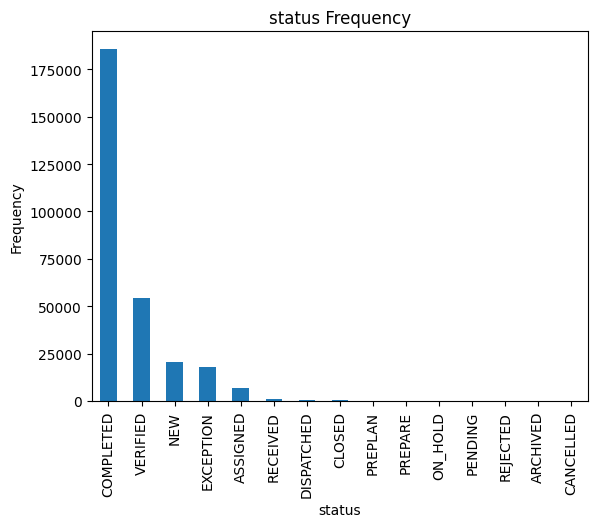

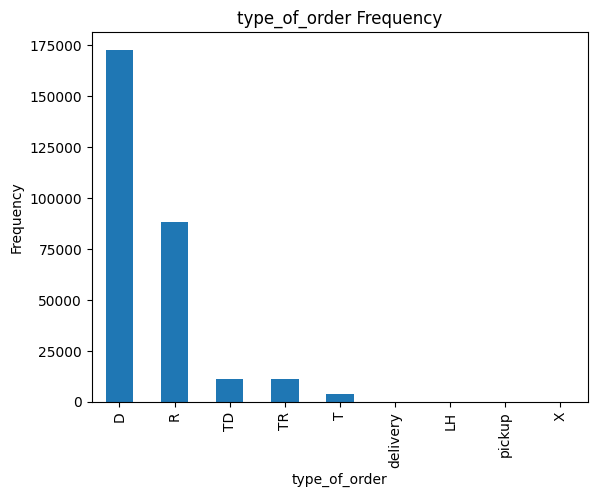

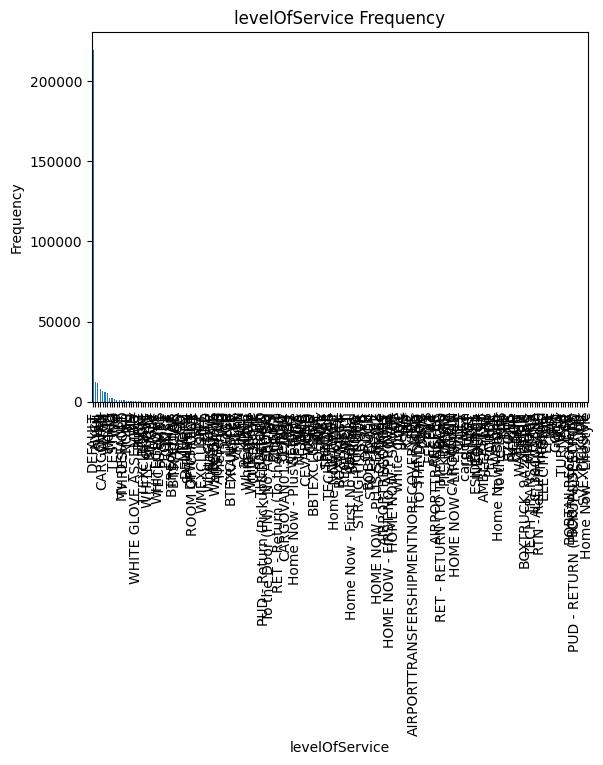

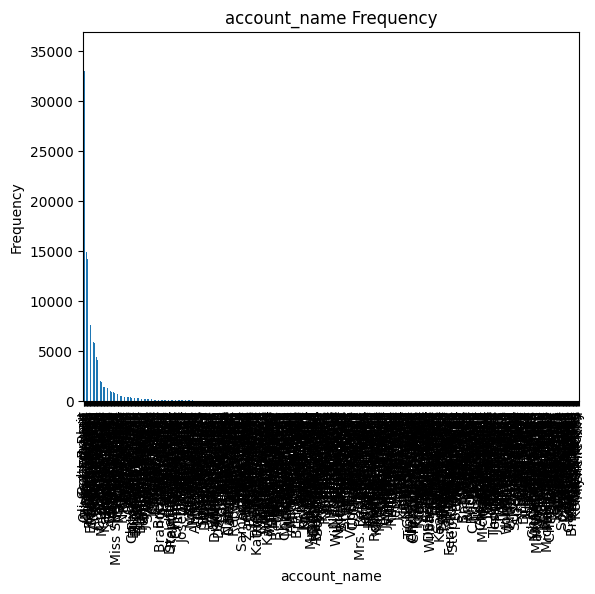

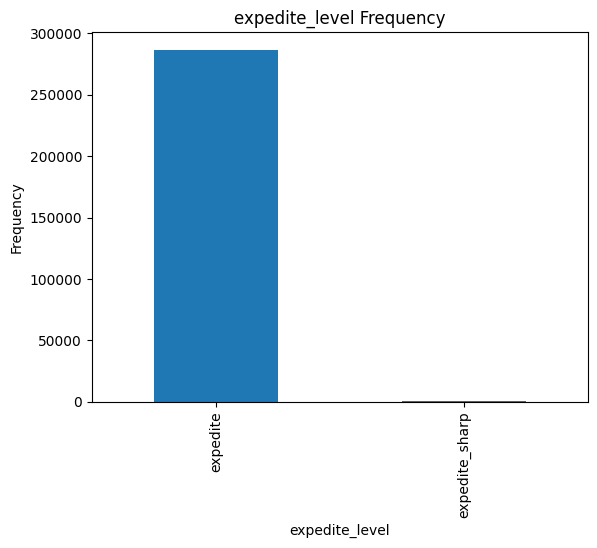

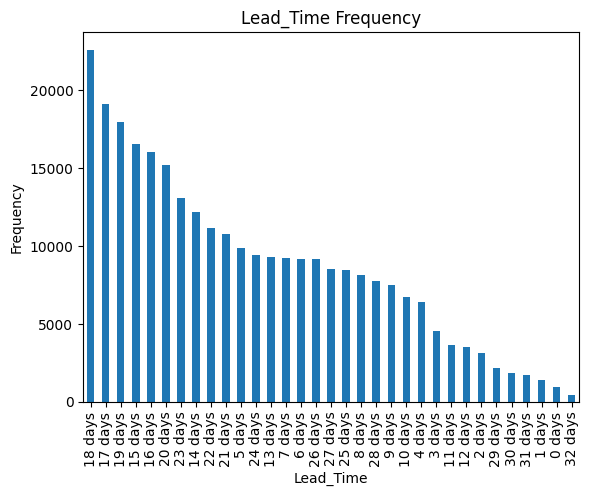

In [44]:
for col in categorical_col:
    df_new[col].value_counts().plot(kind='bar', title=f'{col} Frequency')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

We can clearly Observe the bar-plots are not flat.so let's look at value_counts of each distinct value in every column

In [52]:
df_new['status'].value_counts()

status
COMPLETED     185753
VERIFIED       54408
NEW            20310
EXCEPTION      18170
ASSIGNED        6631
RECEIVED         785
DISPATCHED       556
CLOSED           362
PREPLAN          178
PREPARE          120
ON_HOLD          109
PENDING           86
REJECTED          30
ARCHIVED           7
CANCELLED          4
Name: count, dtype: int64

We will consider only fields for which status is 'COMPLETED','VERIFIED','NEW','EXCEPTION','ASSIGNED','RECEIVED','DISPATCHED'

In [74]:
# First define conditions to include only required labels in columns 'status' and 'type_of_order'
counts_1 = df_new['status'].value_counts(dropna=False)
valid_labels = counts_1[counts_1 > 500].index
condition_1 = df_new['status'].isin(valid_labels)
counts_2 = df_new['type_of_order'].value_counts(dropna=False)
valid_labels = counts_2[counts_2 > 50].index
condition_2 = df_new['type_of_order'].isin(valid_labels) 

# Create a new DataFrame with rows that meet the conditions
df_2 = df_new.loc[condition_1 & condition_2].copy()
# df_2 = df_new[df_new['status'].isin(valid_labels)].copy()

In [76]:
df_2['status'].value_counts()

status
COMPLETED     185728
VERIFIED       54406
NEW            20279
EXCEPTION      18169
ASSIGNED        6629
RECEIVED         783
DISPATCHED       555
Name: count, dtype: int64

In [65]:
df_new['type_of_order'].value_counts()

type_of_order
D           172908
R            88202
TD           11361
TR           11289
T             3603
delivery        82
LH              33
pickup          30
X                1
Name: count, dtype: int64

As 'delivery' is same as 'D', we will change all fields labelled 'delivery' to 'D'

In [66]:
df_new.loc[df_new['type_of_order'] == 'delivery', 'type_of_order'] = 'D'

In [67]:
df_new['type_of_order'].value_counts()

type_of_order
D         172990
R          88202
TD         11361
TR         11289
T           3603
LH            33
pickup        30
X              1
Name: count, dtype: int64

In [44]:
df_new['levelOfService'].value_counts()

levelOfService
DEFAULT                 219511
NYCT                     12658
LYN                      11659
CURB                      8027
CARGOVAN                  7030
                         ...  
JRC                          1
LD                           1
PICKUPS                      1
SVEXCLUSIVE                  1
Home Now - Lifestyle         1
Name: count, Length: 209, dtype: int64

In [55]:
df_new['account_name'].value_counts() 

account_name
Robert Blair       35201
Scott Bryant       33062
Olivia Lawrence    20096
Troy Hill          18377
Richard Barnes     14927
                   ...  
Ronald Abbott          1
Russell Reyes          1
Kendra Watkins         1
Ryan Mccoy             1
Michelle Kim           1
Name: count, Length: 642, dtype: int64

In [83]:
df_2['expedite_level'].value_counts()  

expedite_level
expedite          285608
expedite_sharp       941
Name: count, dtype: int64

In [47]:
df_new['Lead_Time'].value_counts()  

Lead_Time
18 days    22615
17 days    19135
19 days    17948
15 days    16563
16 days    16064
20 days    15186
23 days    13107
14 days    12150
22 days    11134
21 days    10766
5 days      9846
24 days     9417
13 days     9288
7 days      9248
6 days      9191
26 days     9175
27 days     8514
25 days     8476
8 days      8106
28 days     7726
9 days      7505
10 days     6710
4 days      6366
3 days      4561
11 days     3625
12 days     3522
2 days      3105
29 days     2138
30 days     1837
31 days     1727
1 days      1396
0 days       942
32 days      421
Name: count, dtype: int64

In [56]:
df_new.head()

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,account_name,appointment_at,expedite_level,Lead_Time
0,1.0,30,COMPLETED,R,0.0,2023-10-11 21:17:19.232,2023-10-12 16:18:46.230,DEFAULT,2023-10-12 16:17:40.390,1,False,Aaron Hickman,2023-10-04 16:17:40.390,expedite,8 days
1,3.0,30,COMPLETED,D,0.0,2023-11-08 22:15:31.024,2023-11-09 15:15:37.092,DEFAULT,2023-11-09 14:28:16.433,1,False,Aaron Hickman,2023-11-04 14:28:16.433,expedite,5 days
2,1.0,30,COMPLETED,D,0.0,2023-11-30 22:53:35.310,2023-12-04 23:20:21.535,DEFAULT,2023-12-04 23:09:36.288,1,False,Aaron Hickman,2023-11-30 23:09:36.288,expedite,4 days
3,1.0,30,EXCEPTION,R,0.0,2023-10-23 21:15:50.899,2023-10-24 20:07:43.645,DEFAULT,2023-10-24 20:07:36.035,1,False,Aaron Hickman,2023-10-17 20:07:36.035,expedite,7 days
4,1.0,0,COMPLETED,D,0.0,2022-10-25 22:15:45.819,2023-08-04 08:43:42.952,DEFAULT,2022-10-26 16:11:51.437,1,False,Aaron Hickman,2022-10-21 16:11:51.437,expedite,5 days


Let's Observe Time variables

First lets split datetime labels into dates so as to observe patterns

In [84]:
df_1 = df_2.copy()

In [85]:
datetime_col = ['created_at','updated_at','actual_start_datetime','appointment_at']

In [86]:
for col in datetime_col:
    df_1[col+'_date'] = df_1[col].str.split(" ").str[0]

df_1.head()

,quantity,service_delivery_duration,status,type_of_order,weight,created_at,updated_at,levelOfService,actual_start_datetime,attempts,multiday,account_name,appointment_at,expedite_level,Lead_Time,created_at_date,updated_at_date,actual_start_datetime_date,appointment_at_date
0,1.0,30,COMPLETED,R,0.0,2023-10-11 21:17:19.232,2023-10-12 16:18:46.230,DEFAULT,2023-10-12 16:17:40.390,1,False,Aaron Hickman,2023-10-04 16:17:40.390,expedite,8 days,2023-10-11,2023-10-12,2023-10-12,2023-10-04
1,3.0,30,COMPLETED,D,0.0,2023-11-08 22:15:31.024,2023-11-09 15:15:37.092,DEFAULT,2023-11-09 14:28:16.433,1,False,Aaron Hickman,2023-11-04 14:28:16.433,expedite,5 days,2023-11-08,2023-11-09,2023-11-09,2023-11-04
2,1.0,30,COMPLETED,D,0.0,2023-11-30 22:53:35.310,2023-12-04 23:20:21.535,DEFAULT,2023-12-04 23:09:36.288,1,False,Aaron Hickman,2023-11-30 23:09:36.288,expedite,4 days,2023-11-30,2023-12-04,2023-12-04,2023-11-30
3,1.0,30,EXCEPTION,R,0.0,2023-10-23 21:15:50.899,2023-10-24 20:07:43.645,DEFAULT,2023-10-24 20:07:36.035,1,False,Aaron Hickman,2023-10-17 20:07:36.035,expedite,7 days,2023-10-23,2023-10-24,2023-10-24,2023-10-17
4,1.0,0,COMPLETED,D,0.0,2022-10-25 22:15:45.819,2023-08-04 08:43:42.952,DEFAULT,2022-10-26 16:11:51.437,1,False,Aaron Hickman,2022-10-21 16:11:51.437,expedite,5 days,2022-10-25,2023-08-04,2022-10-26,2022-10-21


In [87]:
date_col = ['created_at_date','updated_at_date','actual_start_datetime_date','appointment_at_date']

Let's observe barplots of dates to find important or busy dates

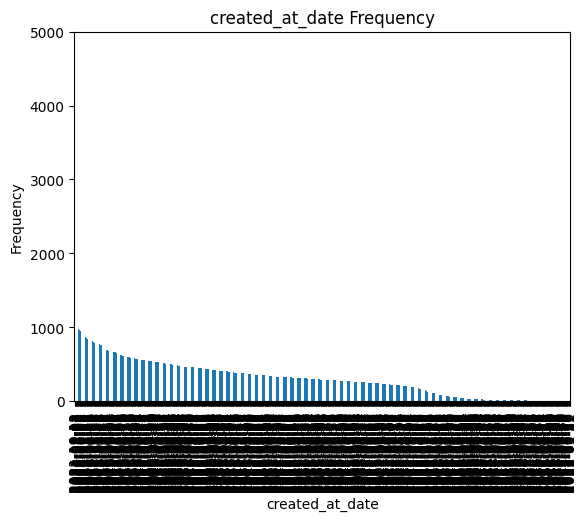

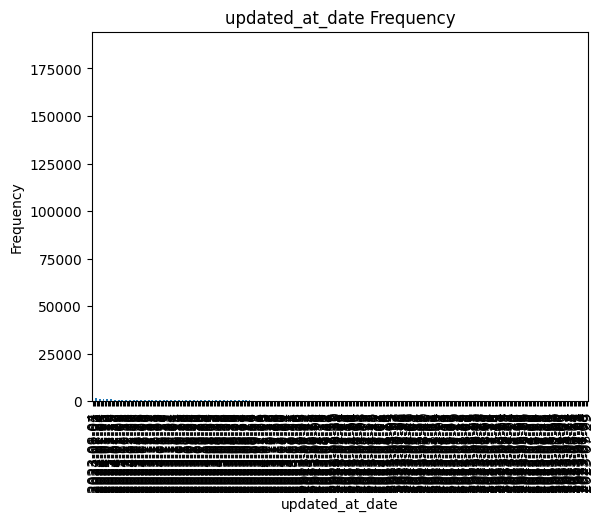

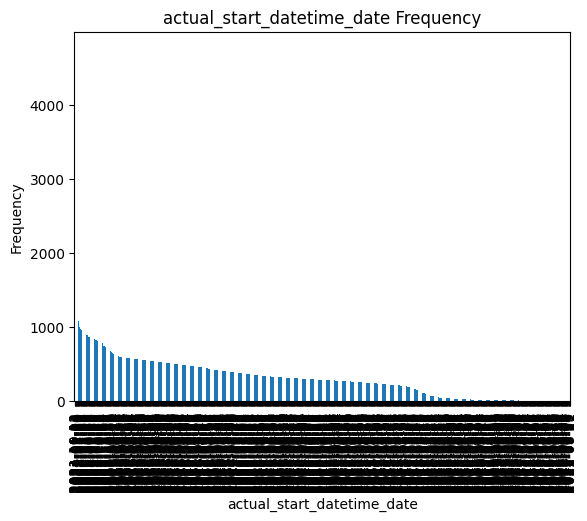

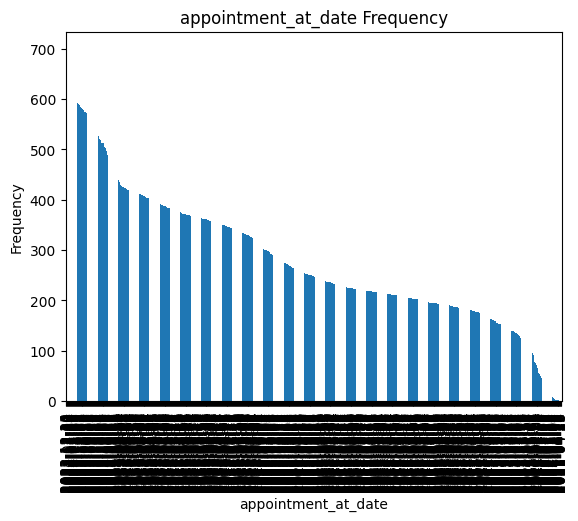

In [88]:
for col in date_col:
    df_1[col].value_counts().plot(kind='bar', title=f'{col} Frequency')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The data is not flat and we can see there many unique dates in each of 'datetime' columns

let's observe unique dates in each column

In [89]:
df_1['created_at_date'].value_counts()

created_at_date
2021-10-12    4762
2021-10-11    1979
2024-01-03    1340
2024-01-04    1318
2023-12-13    1119
              ... 
2021-12-24       1
2021-10-10       1
2022-06-26       1
2021-05-27       1
2022-01-22       1
Name: count, Length: 922, dtype: int64

In [90]:
df_1['updated_at_date'].value_counts()

updated_at_date
2023-08-04    185023
2023-09-07      9721
2024-01-03      1752
2023-08-23      1551
2023-12-20      1355
               ...  
2023-02-04         1
2023-06-18         1
2023-07-08         1
2023-03-05         1
2023-07-29         1
Name: count, Length: 364, dtype: int64

In [91]:
df_1['actual_start_datetime_date'].value_counts()

actual_start_datetime_date
2021-10-12    4752
2021-10-11    1983
2024-01-03    1245
2024-01-24    1174
2024-01-04    1126
              ... 
2021-12-24       1
2021-06-03       1
2021-06-20       1
2021-08-21       1
2022-07-17       1
Name: count, Length: 930, dtype: int64

In [92]:
df_1['appointment_at_date'].value_counts()

appointment_at_date
2023-11-23    699
2023-12-14    678
2023-12-30    676
2023-12-15    675
2023-12-13    672
             ... 
2021-04-29      1
2021-04-22      1
2021-04-14      1
2021-04-26      1
2021-04-25      1
Name: count, Length: 1016, dtype: int64

In [93]:
df_2.to_csv('analyzed_data.csv',index = False)